# 線形モデルによる回帰

In [33]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('sklearn version : ' + sklearn.__version__)

sklearn version : 0.24.0


# データセットの読み込み

In [34]:
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

print("X : \n", X[:5])
print("y : \n", y[:5])

X_train.shape :  (45, 1)
X_test.shape :  (15, 1)
y_train.shape :  (45,)
y_test.shape :  (15,)
X : 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
y : 
 [-1.18073311  0.50015912  0.13772889  1.17396178 -1.32035898]


w[0]: 0.393906  b: -0.031804


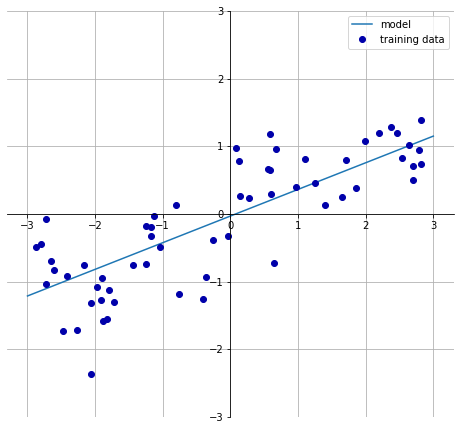

In [36]:
mglearn.plots.plot_linear_regression_wave()

# モデルの学習

In [38]:
lr = LinearRegression().fit(X_train, y_train)

In [39]:
print("coef_:", lr_coef)
print("intercept_:", lr.intercept_)

coef_: 0.39390555116733955
intercept_: -0.031804343026759746


# モデルの評価

In [40]:
lr.score(X_train, y_train)

0.6700890315075756

In [41]:
lr.score(X_test, y_test)

0.65933685968637

# リッジ回帰
モデルの計算式は通常最小二乗法と同じだが、傾きをより小さくするよう制限が加えられている。  
この制限は正規化と呼ばれ、過剰適合を防止する目的がある。
リッジ回帰で用いられている正規化はL2正規化である。
## モデルの学習

In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("coef_:", ridge.coef_)
print("intercept_:", ridge.intercept_)

coef_: [0.39130987]
intercept_: -0.032590614990083935


# モデルの評価

In [43]:
ridge.score(X_train, y_train)

0.67005993422416

In [44]:
ridge.score(X_test, y_test)

0.6577946863634279

## alphaパラメータによる調整
alphaパラメータを大きくすると係数はより0に近づく。  
制約がより強まるため過剰適合の可能性が小さくなるが、訓練データによる学習が行われにくくなる。

In [45]:
ridge10 = Ridge(alpha=100).fit(X_train, y_train)
print("coef_:", ridge10.coef_)
print("intercept_:", ridge10.intercept_)

coef_: [0.23681708]
intercept_: -0.07938878956561486


In [46]:
ridge10.score(X_train, y_train)

0.5635185546836856

In [47]:
ridge10.score(X_test, y_test)

0.4988559598573016

In [48]:
ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)
print("coef_:", ridge01.coef_)
print("intercept_:", ridge01.intercept_)

coef_: [0.39387942]
intercept_: -0.03181225737738254


In [49]:
ridge01.score(X_train, y_train)

0.670089028559508

In [50]:
ridge01.score(X_test, y_test)

0.6593215224430651

# 各モデルの比較

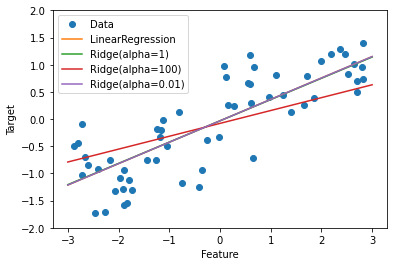

In [54]:
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

plt.plot(X, y, 'o')
plt.plot(line, lr.coef_[0] * line + lr.intercept_)
plt.plot(line, ridge.coef_[0] * line + ridge.intercept_)
plt.plot(line, ridge10.coef_[0] * line + ridge10.intercept_)
plt.plot(line, ridge01.coef_[0] * line + ridge01.intercept_)
plt.ylim(-2, 2)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend(["Data", "LinearRegression", "Ridge(alpha=1)", "Ridge(alpha=100)", "Ridge(alpha=0.01)"], loc="best")